In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('5season.csv')

This is raw dataset whick we collect from kaggle. You can find the dataset easily searching Premier League data set

In [4]:
df.head()

,Unnamed: 0,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,0,Arsenal,Crystal Palace,2,1,H,1,1,D,14,...,6,2,13,19,9,3,2,2,0,1
1,1,Leicester,Everton,2,2,D,1,2,A,11,...,3,3,16,10,3,6,1,1,0,0
2,2,Man United,Swansea,1,2,A,0,1,A,14,...,5,4,14,20,4,0,2,4,0,0
3,3,QPR,Hull,0,1,A,0,0,D,19,...,6,4,10,10,8,9,1,2,0,0
4,4,Stoke,Aston Villa,0,1,A,0,0,D,12,...,2,2,14,9,2,8,0,3,0,0


In [5]:
df.columns

Index(['Unnamed: 0', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG',
       'HTAG', 'HTR', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY',
       'AY', 'HR', 'AR'],
      dtype='object')

# After applying analyzing and applying feature engineering technique we got 31 columns those features actually effect on football match. We created a new csv file with our created features and directly use that csv file.

In [6]:
df = pd.read_csv('EPL_new_dataset.csv')

In [7]:
df.drop(['Unnamed: 0','HomeTeam','AwayTeam','FTR'],axis=1,inplace=True)

In [8]:
df.head()

,HT_GSPGAH,HT_GCPGAH,AT_GSPGAA,AT_GCPGAA,HT_GSPG,HT_GCPG,AT_GSPG,AT_GCPG,HT_PPG,AT_PPG,...,AT_WS4,HT_LS2,HT_LS4,AT_LS2,AT_LS4,H2h_HW,H2h_AW,Drawn,HTWPAH_VS_AT,Result
0,2.178947,0.810526,1.263158,1.557895,1.894737,1.147368,1.221053,1.436842,1.863158,1.178947,...,0,1,0,0,0,6,2,2,60.0,1
1,1.505263,1.126316,1.105263,1.505263,1.415789,1.378947,1.405263,1.331579,1.394737,1.357895,...,0,0,0,0,0,4,4,2,40.0,0
2,1.736842,0.736842,0.921053,1.671053,1.568421,0.963158,1.059211,1.493421,1.852632,1.164474,...,0,1,0,1,1,4,3,1,50.0,-1
3,1.210526,1.263158,0.605263,1.894737,1.105263,1.921053,0.921053,1.723684,0.789474,0.907895,...,0,0,0,0,0,0,2,0,0.0,-1
4,1.289474,1.315789,0.684211,1.921053,1.085526,1.473684,0.763158,1.750000,1.197368,0.723684,...,0,0,0,1,0,3,1,0,50.0,-1


In [9]:
output = df['Result']
df.drop('Result',axis=1,inplace=True)

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaller = StandardScaler()

In [12]:
scaller.fit(df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [13]:
inp = scaller.transform(df)

In [14]:
from sklearn.decomposition import PCA

In [15]:
pca = PCA(n_components=18)

In [16]:
pca.fit(inp)

PCA(copy=True, iterated_power='auto', n_components=18, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [17]:
decom = pca.transform(inp)

In [18]:
# plt.figure(figsize=(20,12))
# sns.heatmap(pca.components_)

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(decom, output, test_size=0.40, random_state=42)

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
lm = LogisticRegression(C=0.5,penalty='l1')

In [23]:
lm.fit(X_train,y_train)

C:\Users\Nasar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nasar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
res = lm.predict(X_test)

In [25]:
from sklearn.metrics import confusion_matrix,classification_report

In [26]:
print(confusion_matrix(res,y_test))
print(classification_report(y_test,res))

[[155  45  29]
 [ 25  71  21]
 [ 51  74 289]]
              precision    recall  f1-score   support

          -1       0.68      0.67      0.67       231
           0       0.61      0.37      0.46       190
           1       0.70      0.85      0.77       339

    accuracy                           0.68       760
   macro avg       0.66      0.63      0.63       760
weighted avg       0.67      0.68      0.66       760



In [27]:
from sklearn.svm import SVC

In [28]:
from sklearn.model_selection import GridSearchCV

In [29]:
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10,100,1000],'gamma':[1,0.1,0.01,0.001]}

WE apply grid search to find best paremeters for svm

In [30]:
gm = SVC(C=10,gamma=0.001,kernel='rbf')
#svc = SVC()

In [31]:
#gm = GridSearchCV(svc, parameters)

In [32]:
gm.fit(X_train,y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [33]:
#gm.best_params_

In [34]:
gres = gm.predict(X_test)

In [35]:
print(confusion_matrix(y_test,gres))
print(classification_report(y_test,gres))

[[156  24  51]
 [ 44  72  74]
 [ 31  20 288]]
              precision    recall  f1-score   support

          -1       0.68      0.68      0.68       231
           0       0.62      0.38      0.47       190
           1       0.70      0.85      0.77       339

    accuracy                           0.68       760
   macro avg       0.66      0.63      0.64       760
weighted avg       0.67      0.68      0.66       760



In [36]:
from sklearn.ensemble import AdaBoostClassifier

In [37]:
rfc = AdaBoostClassifier(base_estimator=LogisticRegression(),n_estimators=500,learning_rate=0.4)

In [38]:
rfc.fit(X_train,y_train)

C:\Users\Nasar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nasar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Nasar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nasar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Nasar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default so

C:\Users\Nasar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Nasar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nasar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Nasar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nasar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default mu

C:\Users\Nasar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Nasar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nasar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Nasar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nasar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default mu

C:\Users\Nasar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Nasar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nasar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Nasar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nasar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default mu

C:\Users\Nasar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Nasar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nasar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Nasar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nasar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default mu

C:\Users\Nasar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Nasar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nasar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Nasar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nasar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default mu

C:\Users\Nasar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Nasar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nasar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Nasar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nasar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default mu

C:\Users\Nasar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Nasar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nasar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Nasar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nasar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default mu

C:\Users\Nasar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Nasar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nasar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Nasar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nasar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default mu

C:\Users\Nasar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Nasar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nasar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Nasar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nasar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default mu

C:\Users\Nasar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Nasar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nasar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Nasar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nasar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default mu

C:\Users\Nasar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Nasar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nasar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Nasar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nasar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default mu

C:\Users\Nasar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Nasar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nasar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Nasar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nasar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default mu

C:\Users\Nasar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Nasar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nasar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Nasar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nasar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default mu

C:\Users\Nasar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Nasar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nasar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Nasar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nasar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default mu

C:\Users\Nasar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Nasar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nasar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Nasar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nasar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default mu

C:\Users\Nasar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Nasar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nasar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Nasar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nasar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default mu

C:\Users\Nasar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Nasar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nasar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Nasar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nasar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default mu

C:\Users\Nasar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Nasar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nasar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Nasar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nasar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default mu

C:\Users\Nasar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Nasar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nasar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Nasar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nasar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default mu

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                     dual=False,
                                                     fit_intercept=True,
                                                     intercept_scaling=1,
                                                     l1_ratio=None,
                                                     max_iter=100,
                                                     multi_class='warn',
                                                     n_jobs=None, penalty='l2',
                                                     random_state=None,
                                                     solver='warn', tol=0.0001,
                                                     verbose=0,
                                                     warm_start=False),
                   learning_rate=0.4, n_estimators=500, random_state=None)

In [39]:
rfc_res = rfc.predict(X_test)

In [40]:
print(confusion_matrix(y_test,rfc_res))
print(classification_report(y_test,rfc_res))

[[153  31  47]
 [ 43  85  62]
 [ 29  34 276]]
              precision    recall  f1-score   support

          -1       0.68      0.66      0.67       231
           0       0.57      0.45      0.50       190
           1       0.72      0.81      0.76       339

    accuracy                           0.68       760
   macro avg       0.65      0.64      0.64       760
weighted avg       0.67      0.68      0.67       760



In [41]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)
gbc_res = gbc.predict(X_test)
print(confusion_matrix(y_test,gbc_res))
print(classification_report(y_test,gbc_res))

[[121  38  72]
 [ 42  57  91]
 [ 49  49 241]]
              precision    recall  f1-score   support

          -1       0.57      0.52      0.55       231
           0       0.40      0.30      0.34       190
           1       0.60      0.71      0.65       339

    accuracy                           0.55       760
   macro avg       0.52      0.51      0.51       760
weighted avg       0.54      0.55      0.54       760



# We got best accuracy of 68% using Logistic Regression and AdaBost

In [42]:
data = pd.read_csv('EPL_new_dataset.csv')

In [43]:
data.drop(['Unnamed: 0','Result'],axis=1,inplace=True)
data.head()

,HomeTeam,AwayTeam,FTR,HT_GSPGAH,HT_GCPGAH,AT_GSPGAA,AT_GCPGAA,HT_GSPG,HT_GCPG,AT_GSPG,...,AT_WS2,AT_WS4,HT_LS2,HT_LS4,AT_LS2,AT_LS4,H2h_HW,H2h_AW,Drawn,HTWPAH_VS_AT
0,Arsenal,Crystal Palace,H,2.178947,0.810526,1.263158,1.557895,1.894737,1.147368,1.221053,...,0,0,1,0,0,0,6,2,2,60.0
1,Leicester,Everton,D,1.505263,1.126316,1.105263,1.505263,1.415789,1.378947,1.405263,...,0,0,0,0,0,0,4,4,2,40.0
2,Man United,Swansea,A,1.736842,0.736842,0.921053,1.671053,1.568421,0.963158,1.059211,...,0,0,1,0,1,1,4,3,1,50.0
3,QPR,Hull,A,1.210526,1.263158,0.605263,1.894737,1.105263,1.921053,0.921053,...,0,0,0,0,0,0,0,2,0,0.0
4,Stoke,Aston Villa,A,1.289474,1.315789,0.684211,1.921053,1.085526,1.473684,0.763158,...,0,0,0,0,1,0,3,1,0,50.0


In [44]:
gp = data.groupby('FTR')

In [45]:
gp.count()['HomeTeam']

FTR
A    576
D    454
H    870
Name: HomeTeam, dtype: int64

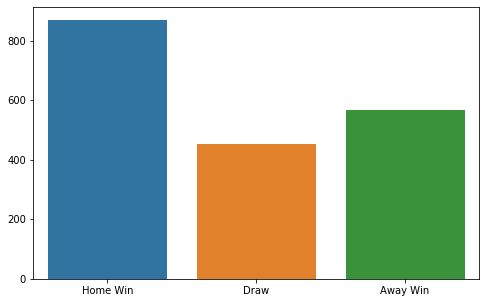

In [46]:
x = ['Home Win','Draw','Away Win']
y = [870,454,567]
plt.figure(figsize=(8,5))
sns.barplot(x,y)

In [47]:
# total home win
156+24+51

231

In [46]:
# total draw
43+85+62

190

In [47]:
# total away win
29+34+276

339

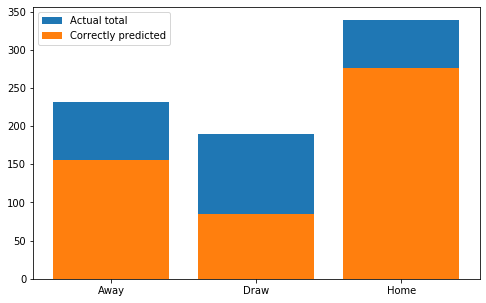

In [48]:
plt.figure(figsize=(8,5))
p1 =plt.bar(['Away','Draw','Home'],[231,190,339])
p2 =plt.bar(['Away','Draw','Home'],[156,85,276])
plt.legend((p1[0],p2[0]),('Actual total','Correctly predicted'))

In [49]:
def _gon(tester):
    _count = {'Home':0,'Draw':0,'Away':0}
    for i in tester:
        if i==1:
            _count['Home']+=1
        elif i==0:
            _count['Draw']+=1
        else:
            _count['Away']+=1
    return _count

In [50]:
_gon(res)

{'Home': 414, 'Draw': 117, 'Away': 229}

In [51]:
x = ['SVM','LR','NB','DTC','ABC']
y = [66,67,64,64,67]

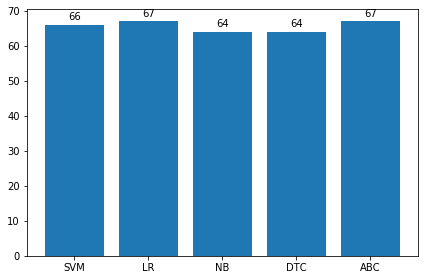

In [52]:
fig, ax = plt.subplots()
rects1 = ax.bar(x,y)
ax.set_xticklabels(x)
#ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects1)

fig.tight_layout()

plt.show()

In [53]:
339+231+190

760

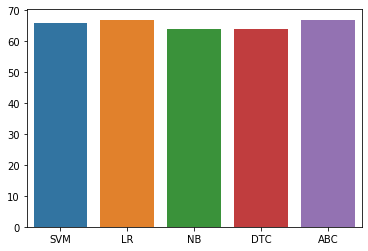

In [56]:
sns.barplot(x,y)

In [86]:
data.tail(20)

,HomeTeam,AwayTeam,FTR,HT_GSPGAH,HT_GCPGAH,AT_GSPGAA,AT_GCPGAA,HT_GSPG,HT_GCPG,AT_GSPG,...,AT_WS2,AT_WS4,HT_LS2,HT_LS4,AT_LS2,AT_LS4,H2h_HW,H2h_AW,Drawn,HTWPAH_VS_AT
1880,Everton,Burnley,H,1.705263,1.157895,0.894737,1.644737,1.405263,1.331579,0.973684,...,0,0,0,0,0,0,5,3,0,75.0
1881,Bournemouth,Tottenham,H,1.500000,1.552632,1.757895,1.147368,1.322368,1.743421,1.863158,...,0,0,0,0,0,0,1,6,1,25.0
1882,Cardiff,Crystal Palace,A,1.105263,2.000000,1.263158,1.557895,0.894737,1.815789,1.221053,...,0,0,0,0,0,0,0,1,1,0.0
1883,Newcastle,Liverpool,A,1.355263,1.223684,1.663158,1.263158,1.085526,1.467105,1.926316,...,1,1,0,0,0,0,2,4,2,50.0
1884,West Ham,Southampton,H,1.410526,1.347368,1.010526,1.378947,1.347368,1.500000,1.242105,...,0,0,0,0,0,0,5,4,1,60.0
1885,Wolves,Fulham,H,1.473684,1.105263,0.631579,2.368421,1.236842,1.210526,0.894737,...,1,0,0,0,0,0,1,0,1,100.0
1886,Arsenal,Brighton,D,2.178947,0.810526,0.684211,1.605263,1.894737,1.147368,0.907895,...,0,0,1,0,0,0,1,1,2,50.0
1887,Chelsea,Watford,H,2.021053,0.884211,1.026316,1.763158,1.800000,1.026316,1.157895,...,0,0,0,0,0,0,5,1,2,75.0
1888,Huddersfield,Man United,D,0.684211,1.473684,1.400000,1.189474,0.657895,1.763158,1.568421,...,0,0,1,0,1,0,1,2,1,50.0
1889,Man City,Leicester,H,2.589474,0.821053,1.326316,1.631579,2.289474,0.884211,1.415789,...,0,0,0,0,0,0,6,3,1,80.0


C:\Users\Nasar\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  after removing the cwd from sys.path.


([<matplotlib.patches.Wedge at 0x291ad420ba8>,
 [Text(0.8465372893565398, 0.7024063053026233, 'Wolves'),
  Text(-0.7373755278863017, 0.816258127600821, 'Draw'),
  Text(0.046246437843175246, -1.0990274186692603, 'Liverpool')],
 [Text(0.4617476123762944, 0.383130711983249, '22.05%'),
  Text(-0.40220483339252816, 0.4452317059640841, '29.29%'),
  Text(0.02522532973264104, -0.5994695010923238, '48.66%')])

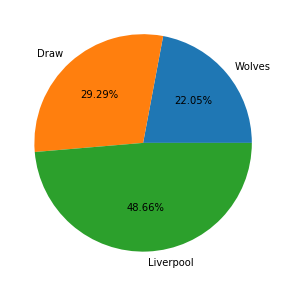

In [74]:
liv_vs_wolvs = pca.transform([df.tail().iloc[0]])
xxx= rfc.predict_proba(liv_vs_wolvs)
yyy = ['Wolves','Draw','Liverpool']
plt.figure(figsize=(8,5))
plt.pie(xxx,labels=yyy,autopct='%1.2f%%')

C:\Users\Nasar\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """


([<matplotlib.patches.Wedge at 0x291ae7717f0>,
 [Text(0.7849392791060672, 0.7706298256078905, 'L'),
  Text(-0.8751252909863839, 0.6664500919618791, 'Draw'),
  Text(0.15757632086306742, -1.0886549972802493, 'New')],
 [Text(0.4281486976942184, 0.4203435412406675, '24.71%'),
  Text(-0.4773410678107548, 0.36351823197920674, '29.87%'),
  Text(0.08595072047076403, -0.5938118166983177, '45.42%')])

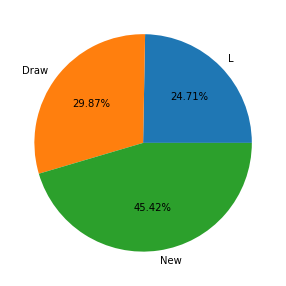

In [93]:
liv_vs_wolvs = pca.transform([df.tail(20).iloc[3]])
xxx= rfc.predict_proba(liv_vs_wolvs)
yyy = ['L','Draw','New']
plt.figure(figsize=(8,5))
plt.pie(xxx,labels=yyy,autopct='%1.2f%%')